<a href="https://colab.research.google.com/github/rajasimha5/ICP1/blob/main/icp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.0078 - loss: 0.4411 - val_accuracy: 0.0143 - val_loss: 0.3138
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.0146 - loss: 0.3085 - val_accuracy: 0.0153 - val_loss: 0.3027
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0143 - loss: 0.2982 - val_accuracy: 0.0151 - val_loss: 0.2961
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.0159 - loss: 0.2928 - val_accuracy: 0.0154 - val_loss: 0.2920
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.0172 - loss: 0.2888 - val_accuracy: 0.0196 - val_loss: 0.2892
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.0200 - loss: 0.2862 - val_accuracy: 0.0193 - val_loss: 0.2872
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0214 - loss: 0.2844 - val_accuracy: 0.0217 - val_loss: 0.2853
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.0211 - loss: 0.2825 - val_ac

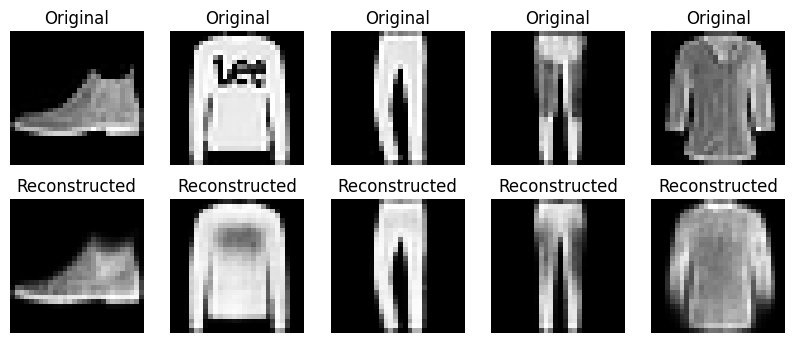

In [14]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)   # 1st hidden layer
encoded = Dense(128, activation='relu')(encoded)     # 2nd hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)     # 1st hidden layer in decoder
decoded = Dense(256, activation='relu')(decoded)     # 2nd hidden layer in decoder
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)#connecting input to output to form a complete encoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#loading and preparing the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.# dividing by 255 to get 0-1 range for bttr training.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))# reshape converts 2d imgaes to 1dvectors
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#train the model to reconstruct its own input
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))
# Predict on test data
decoded_imgs = autoencoder.predict(x_test)


n = 5  # number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()



In [3]:
# Introduce noise by adding random pixels to each image
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)#keeeps pixel value between 0 and 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build same autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

denoise_autoencoder = Model(input_img, decoded)
denoise_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on noisy images
history_denoise = denoise_autoencoder.fit(x_train_noisy, x_train,
                                          epochs=10,
                                          batch_size=256,
                                          shuffle=True,
                                          validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0059 - loss: 0.4633 - val_accuracy: 0.0113 - val_loss: 0.3351
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0109 - loss: 0.3286 - val_accuracy: 0.0153 - val_loss: 0.3234
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0142 - loss: 0.3182 - val_accuracy: 0.0151 - val_loss: 0.3165
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0149 - loss: 0.3124 - val_accuracy: 0.0171 - val_loss: 0.3136
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0156 - loss: 0.3089 - val_accuracy: 0.0141 - val_loss: 0.3112
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0155 - loss: 0.3063 - val_accuracy: 0.0174 - val_loss: 0.3091
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0157 - loss: 0.3053 - val_accuracy: 0.0138 - val_loss: 0.3076
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0159 - loss: 0.3037 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


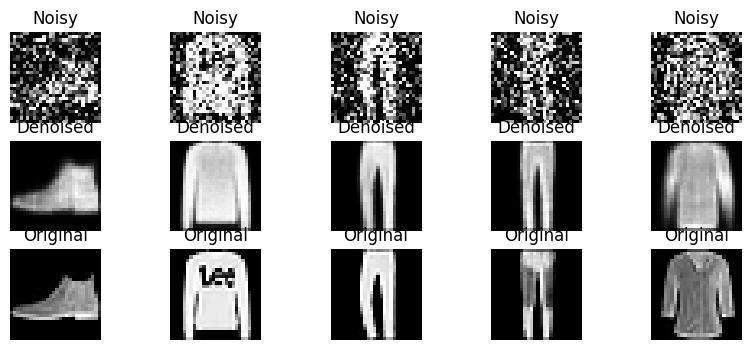

In [4]:
decoded_imgs_denoised = denoise_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(10, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_denoised[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

    # original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")
plt.show()


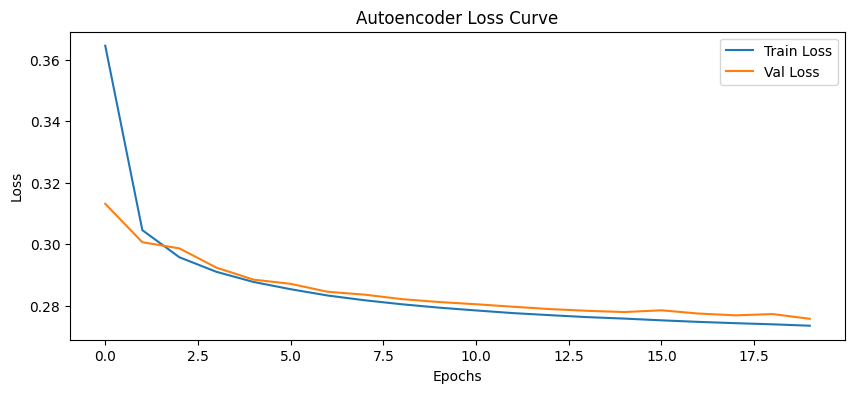

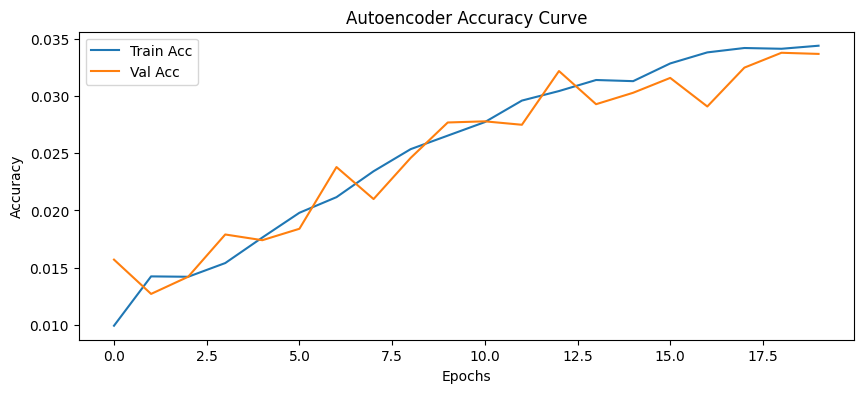

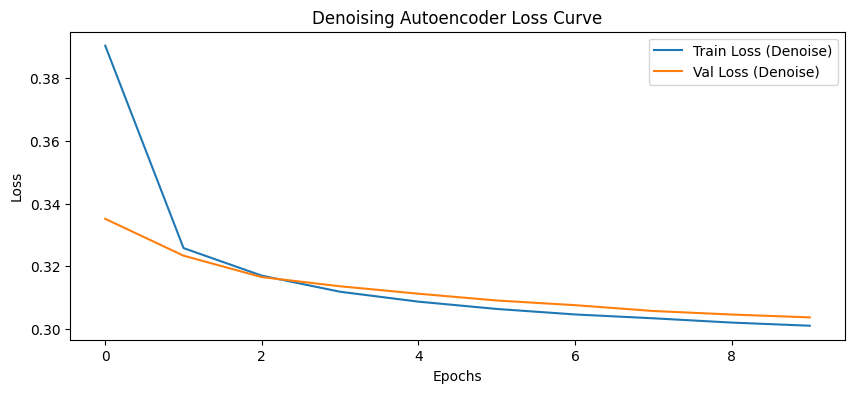

In [11]:
# Plot for regular autoencoder
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Autoencoder Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Autoencoder Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Plot for denoising autoencoder
plt.figure(figsize=(10,4))
plt.plot(history_denoise.history['loss'], label='Train Loss (Denoise)')
plt.plot(history_denoise.history['val_loss'], label='Val Loss (Denoise)')
plt.title("Denoising Autoencoder Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()